CodeClause : Data Science Intern
Name : ATIF MUNIR
Project Name : Fraud Detection

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import metrics
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df['Class'].value_counts() #0 is not frauded and 1 is frauded

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

1081

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(283726, 31)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


<Axes: ylabel='count'>

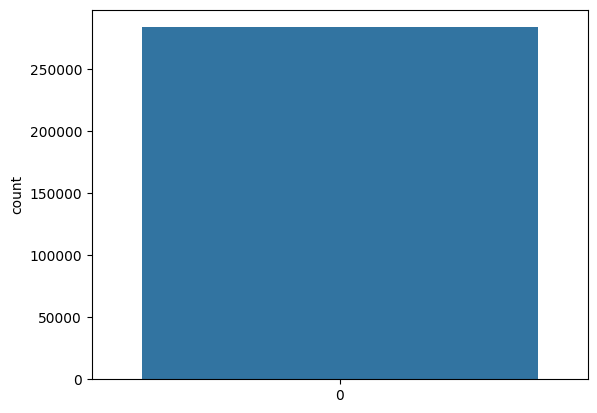

In [12]:
sns.countplot(df['Class'])

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: ylabel='count'>

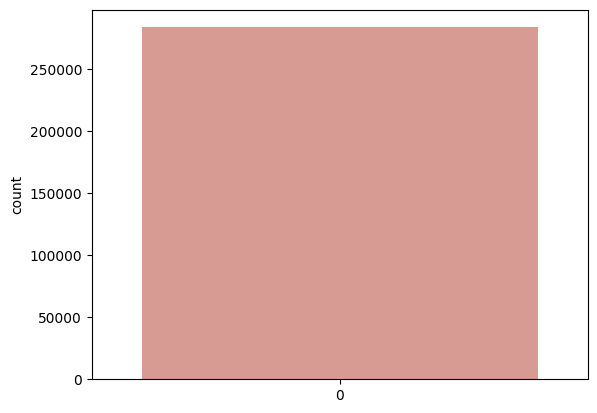

In [14]:
sns.countplot(df['Class'],color="salmon",saturation = 0.5)

In [15]:
df['Class'].value_counts() 

Class
0    283253
1       473
Name: count, dtype: int64

In [16]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [17]:
#feature scalling to normalize data in range 0:1
stand=MinMaxScaler()
df[['Amount']] = stand.fit_transform(df[['Amount']])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


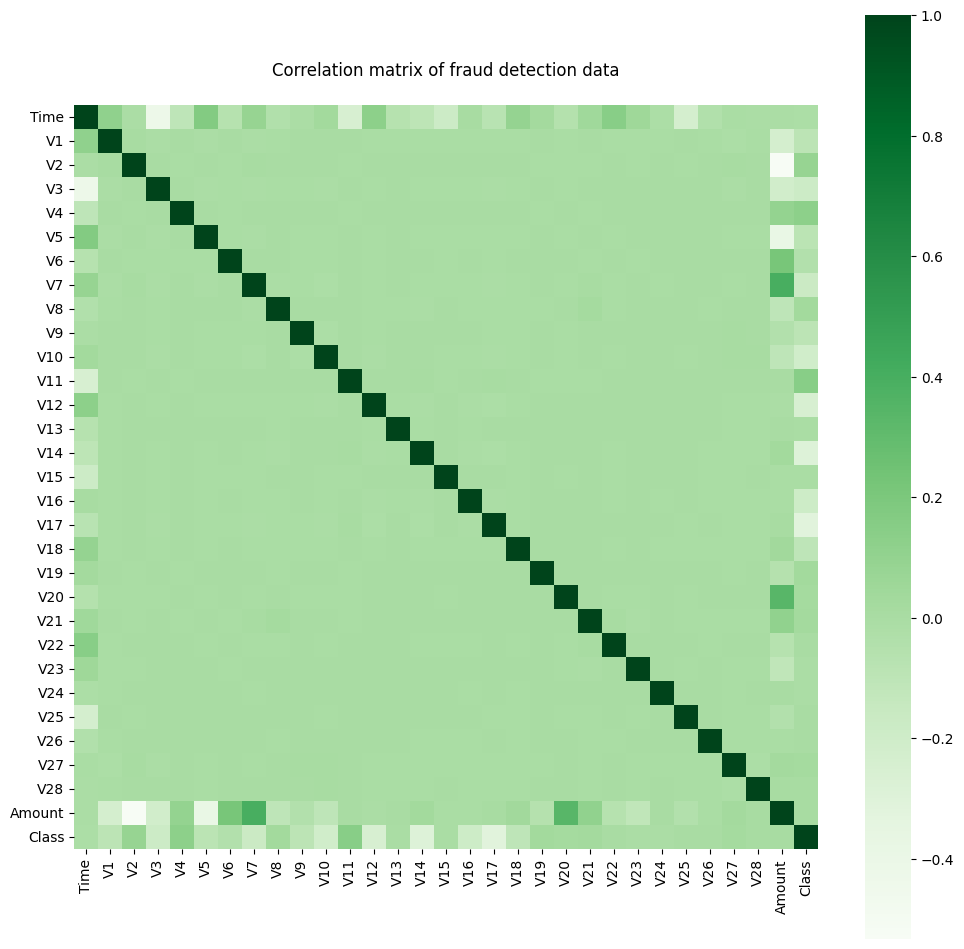

In [18]:
#representing correlation between features
plt.figure(figsize=(12,12))
hm = sns.heatmap(df.corr(), square = True,cmap="Greens")
hm.set(title = "Correlation matrix of fraud detection data\n")

plt.show()

In [19]:
#As we count of unfrauded is much more than the frauded class so we'll take a sample from the unfrauded class
frauded = df[df.Class == 1]
unfrauded = df[df.Class == 0]

sampleOfUnfrauded = unfrauded.sample(n = 2000)
newdf = pd.concat([sampleOfUnfrauded,frauded],axis = 0)
newdf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91407,63454.0,1.257631,0.394783,0.317826,0.687931,-0.323667,-1.060838,0.122387,-0.234100,-0.048409,...,-0.281747,-0.785840,0.123396,0.359982,0.234343,0.092664,-0.019484,0.031887,0.000050,0
186502,127137.0,2.087667,-0.985841,-0.331517,-0.311583,-1.394487,-0.813708,-0.951458,-0.035422,0.235734,...,-0.636123,-1.373970,0.534880,-0.056091,-0.823309,0.236004,-0.027266,-0.040031,0.000854,0
255736,157374.0,-0.200535,0.110414,0.626510,0.080366,0.752207,0.097947,1.119132,-0.541200,0.275438,...,-0.041831,0.357364,-0.077458,0.454512,-0.940329,0.209771,-0.163160,-0.279276,0.004468,0
166011,117808.0,-0.239949,0.513241,-0.922635,-2.135088,-0.446040,0.373405,-2.158141,-5.344966,-1.682339,...,-1.995485,2.122181,-0.017954,0.786587,0.431839,-0.127798,0.103159,0.328628,0.001977,0
271363,164539.0,1.777123,-0.616137,-0.427450,0.508658,-0.753670,-0.640543,-0.332382,-0.159272,1.126157,...,0.294945,0.831866,0.044122,0.028123,-0.169186,-0.255205,0.022124,-0.016285,0.004476,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,0.015180,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.000030,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.003032,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.009536,1


In [20]:
newdf['Class'].value_counts() #It seems good we'll use this new dataframe to apply models on it

Class
0    2000
1     473
Name: count, dtype: int64

<Axes: xlabel='Amount', ylabel='Class'>

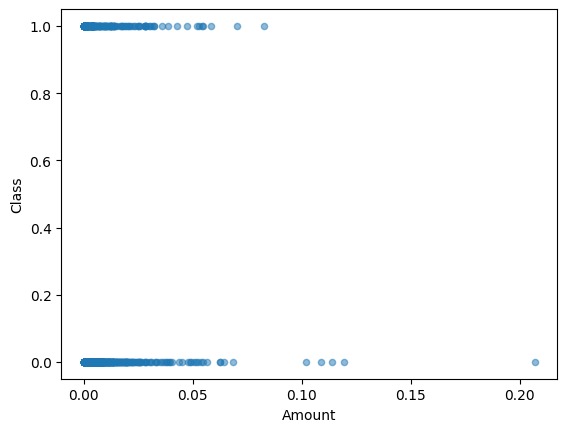

In [21]:
newdf.plot.scatter(x = "Amount", y = "Class", alpha = 0.5)

<Axes: >

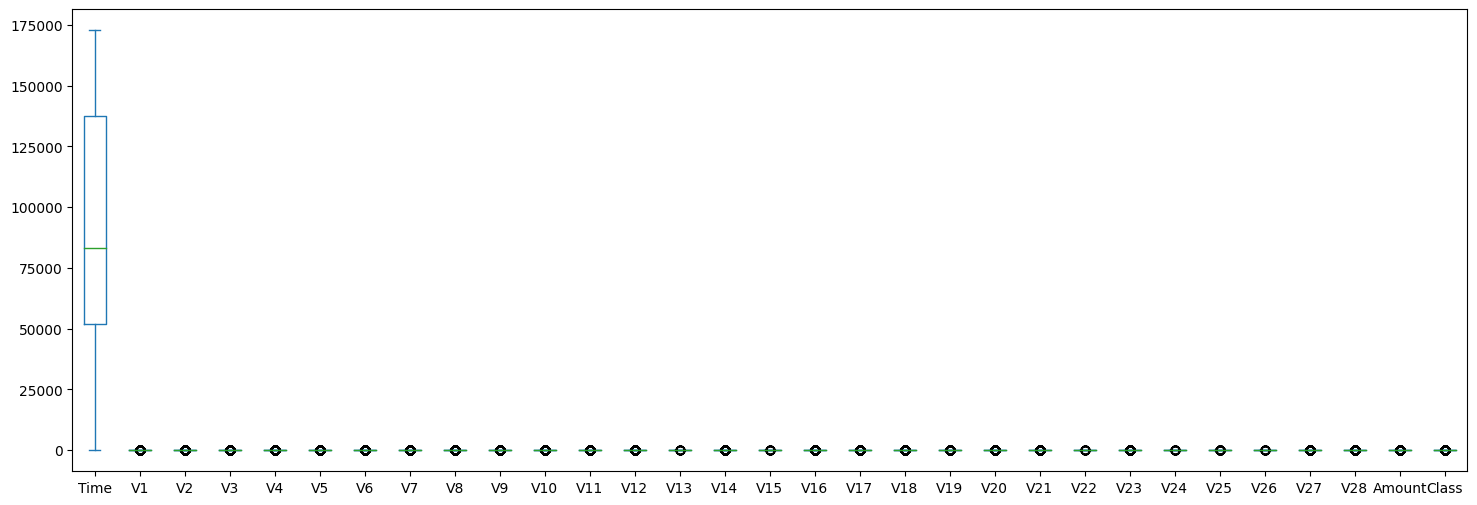

In [22]:
newdf.plot.box(figsize=(18,6))

<Axes: >

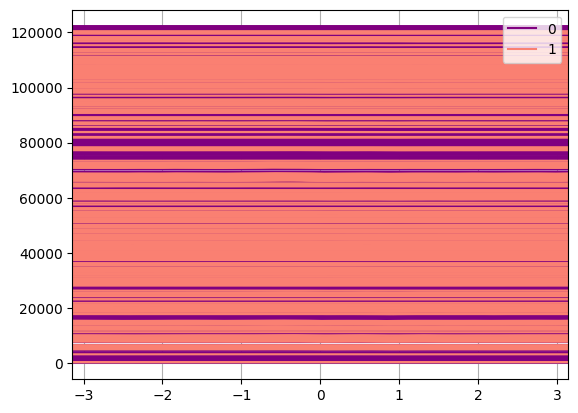

In [23]:
#Andrews curves are used to visualize high_dimensional data by mapping each observation to a function
pd.plotting.andrews_curves(newdf, 'Class', color = ["purple", "salmon"])

In [24]:
shuffled = shuffle(newdf)
print(shuffled.head())

            Time        V1        V2        V3        V4        V5        V6   
28945    35247.0 -1.830513 -0.479091  1.425470 -1.448583 -1.444315 -0.657951  \
110836   71994.0 -3.251517  3.729090 -1.946837 -0.015435 -0.466102 -0.746641   
215953  140293.0  0.951025  3.252926 -5.039105  4.632411  3.014501 -1.349570   
48060    43477.0 -1.577758  1.275930  1.884030 -0.208085 -0.673255  0.057036   
43773    41646.0 -3.240187  2.978122 -4.162314  3.869124 -3.645256 -0.126271   

              V7        V8        V9  ...       V21       V22       V23   
28945   0.607833  0.426051 -1.598070  ...  0.203019 -0.246327  0.617185  \
110836  0.142727  0.791876  1.754718  ... -0.215528  0.196832  0.171830   
215953  0.980940 -1.819539 -2.099049  ...  1.404524 -0.760549  0.358292   
48060  -0.137367  0.761232 -0.381993  ...  0.031052  0.018586 -0.097706   
43773  -4.744730 -0.065331 -2.168366  ...  2.601441  0.231910 -0.036490   

             V24       V25       V26       V27       V28    Amount  

<Axes: >

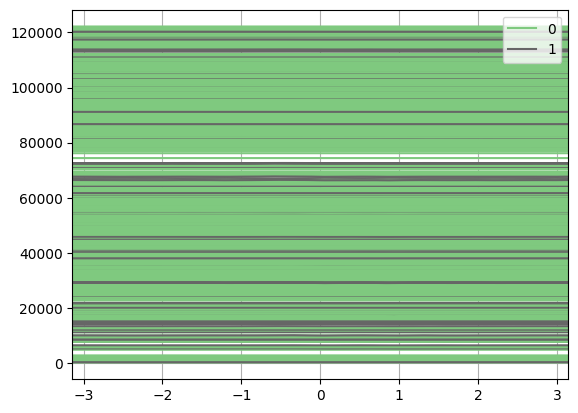

In [25]:
pd.plotting.andrews_curves(newdf.sample(n = 1000), 'Class', colormap = "Accent")

Models

In [26]:
X = newdf.iloc[:,:-1]
Y = newdf.iloc[:,-1]

In [27]:
print(X.shape)
print(Y.shape)

(2473, 30)
(2473,)


In [28]:
#splliting data to train and test with 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, shuffle=True, random_state=10)

In [29]:
#A list to save accuracy score for each model
scores=[]

random forest accuracy: 0.9693053311793215
random forest precision  0.9791666666666666
random forest recall  0.8468468468468469


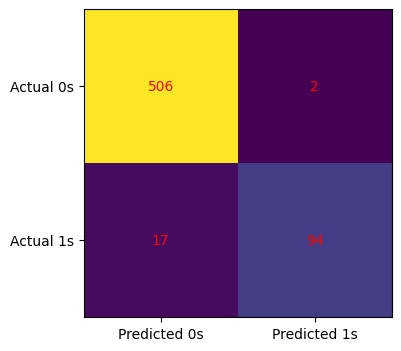

In [30]:
#random forest
classifier = RandomForestClassifier(n_estimators = 100)
#train the model
classifier.fit(X_train, y_train)
#predict with the test data
y_pred = classifier.predict(X_test)

print("random forest accuracy:",accuracy_score(y_test,y_pred))
print("random forest precision ",metrics.precision_score(y_test,y_pred))
print("random forest recall ",metrics.recall_score(y_test,y_pred))

#adding accuracy for the model in scores list
scores.append({
        'model': 'Random forest',
        'accuracy':accuracy_score(y_test,y_pred)})

#confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
        
plt.show()

desicion tree accuracy: 0.9499192245557351
desicion tree precision:  0.8773584905660378
desicion tree recall:  0.8378378378378378


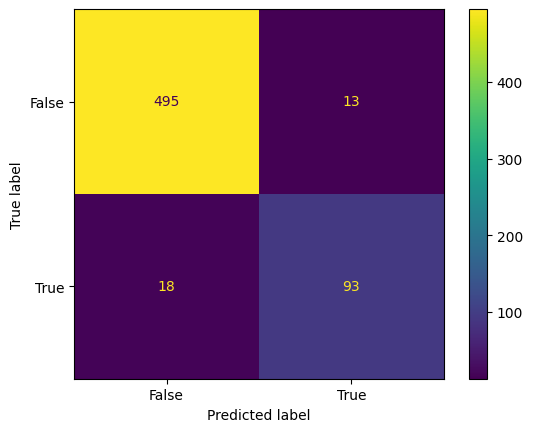

In [31]:
#desicion tree 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("desicion tree accuracy:",accuracy_score(y_test,predictions))
print("desicion tree precision: ",metrics.precision_score(y_test,predictions))
print("desicion tree recall: ",metrics.recall_score(y_test,predictions))

scores.append({
        'model': 'Decision tree',
        'accuracy':accuracy_score(y_test,predictions) })

confusionMatrix = metrics.confusion_matrix(y_test, predictions)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cm.plot()

plt.show()

logistic regression accuracy:  0.962843295638126
logistic regression precision  0.9313725490196079
logistic regression recall  0.8558558558558559


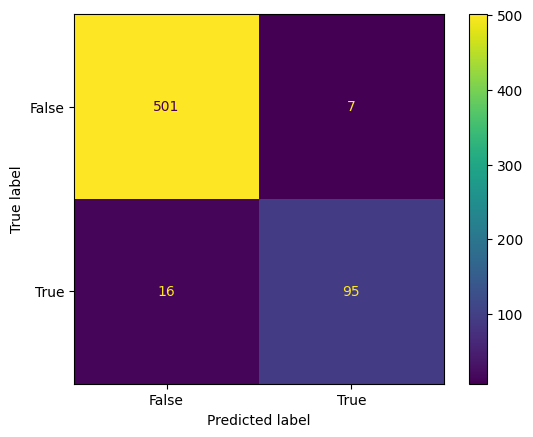

In [32]:
#logistic regression
log = LogisticRegression()
pred = log.fit(X_train,y_train).predict(X_test)

print("logistic regression accuracy: ",accuracy_score(y_test,pred))
print("logistic regression precision ",metrics.precision_score(y_test,pred))
print("logistic regression recall ",metrics.recall_score(y_test,pred))

scores.append({
        'model': 'logistic regression',
        'accuracy':accuracy_score(y_test,pred) })

confusionMatrix = metrics.confusion_matrix(y_test, pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cm.plot()

plt.show()

SVM accuracy:  0.840064620355412
SVM precision  0.8333333333333334
SVM recall  0.13513513513513514
best parameters:  {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


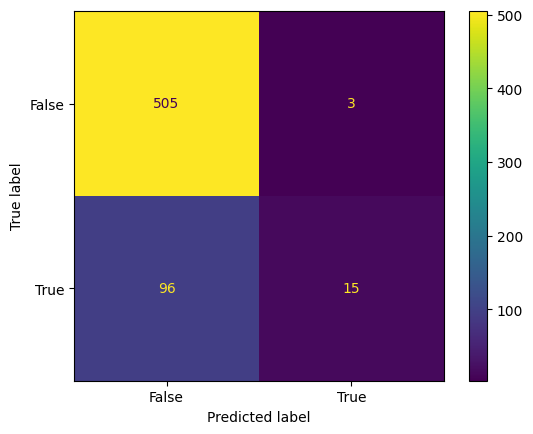

In [33]:
#SVM
#we use grid search to choose the best parameters 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}

grid_SVM = GridSearchCV(SVC(), param_grid)
grid_SVM.fit(X_train, y_train)
pred=grid_SVM.predict(X_test)

print("SVM accuracy: ", accuracy_score(y_test, pred))
print("SVM precision ",metrics.precision_score(y_test,pred))
print("SVM recall ",metrics.recall_score(y_test,pred))
print("best parameters: ",grid_SVM.best_params_)

scores.append({
        'model': 'SVM',
        'accuracy':accuracy_score(y_test,pred) })

confusionMatrix = metrics.confusion_matrix(y_test, pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cm.plot()

plt.show()

GaussianNB accuracy:  0.9450726978998385
GaussianNB precision  0.9529411764705882
GaussianNB recall  0.7297297297297297


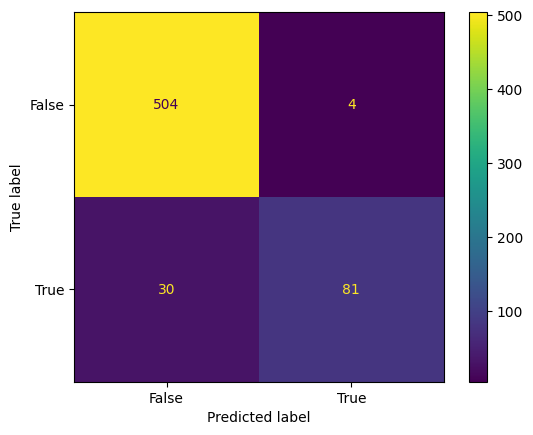

In [34]:
GNB = GaussianNB()
pred = GNB.fit(X_train,y_train).predict(X_test)

print("GaussianNB accuracy: ",accuracy_score(y_test,pred))
print("GaussianNB precision ",metrics.precision_score(y_test,pred))
print("GaussianNB recall ",metrics.recall_score(y_test,pred))
scores.append({
        'model': 'GaussianNB',
        'accuracy':accuracy_score(y_test,pred) })

confusionMatrix = metrics.confusion_matrix(y_test, pred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cm.plot()

plt.show()

In [35]:
#printing accuracy for each model 
df_score = pd.DataFrame(scores,columns=['model','accuracy'])
df_score

,model,accuracy
0,Random forest,0.969305
1,Decision tree,0.949919
2,logistic regression,0.962843
3,SVM,0.840065
4,GaussianNB,0.945073


(0.0, 1.0)

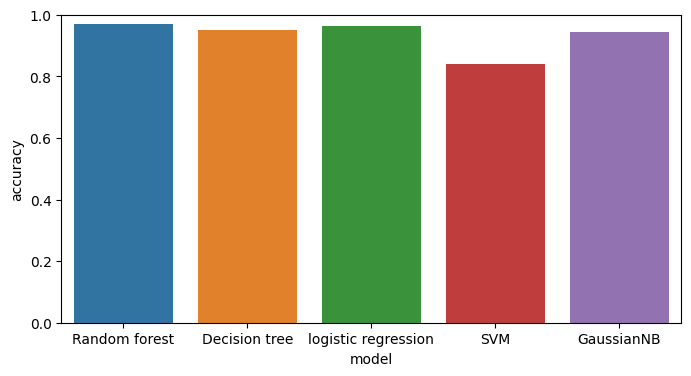

In [36]:
#visualization for each model's accuracy
plt.figure(figsize=(8,4))
sns.barplot(x="model", y="accuracy", data=df_score)
plt.ylim(0, 1)

#conclusion: Random forest is the highest accuracy and SVM is the lowest

In [37]:
#classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       508
           1       0.98      0.85      0.91       111

    accuracy                           0.97       619
   macro avg       0.97      0.92      0.94       619
weighted avg       0.97      0.97      0.97       619

